In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
def create_data(num_points, num_clusters):
    """Generate synthetic clustering data."""
    data, labels = make_blobs(n_samples=num_points, centers=num_clusters, random_state=42)
    return data, labels

In [3]:
def create_data(num_points, num_clusters):
    """Generate synthetic clustering data."""
    data, labels = make_blobs(n_samples=num_points, centers=num_clusters, random_state=42)
    return data, labels

sample_sizes = [1000, 5000, 10000]
cluster_counts = [5, 7, 9]

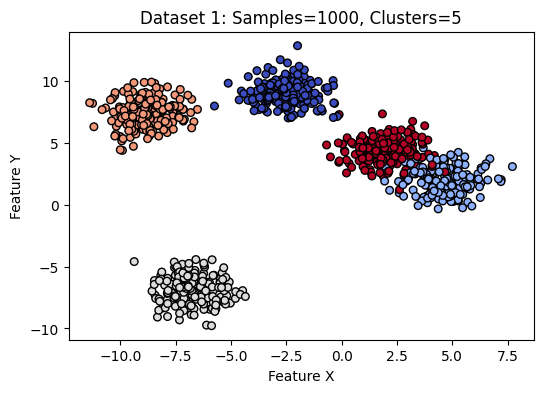

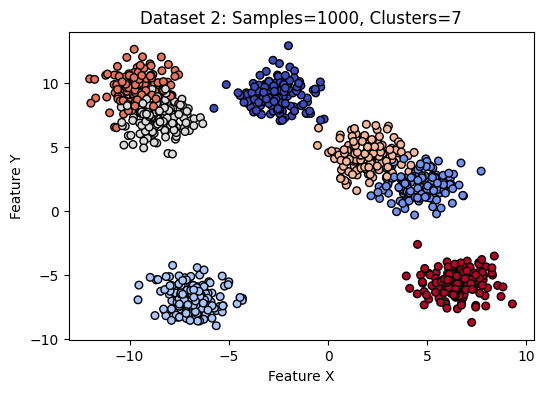

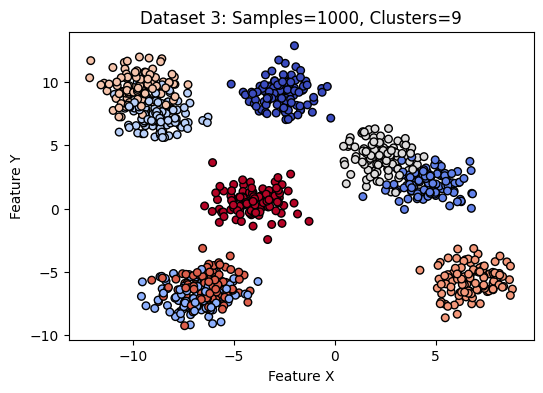

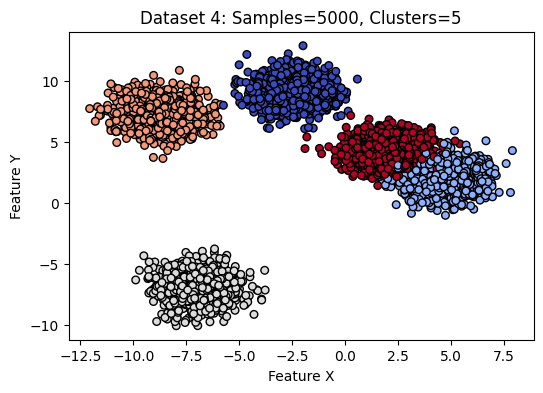

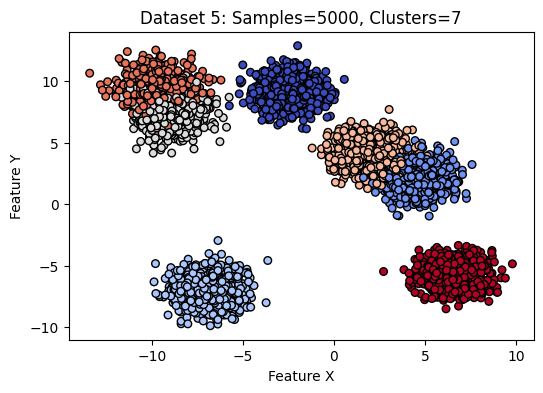

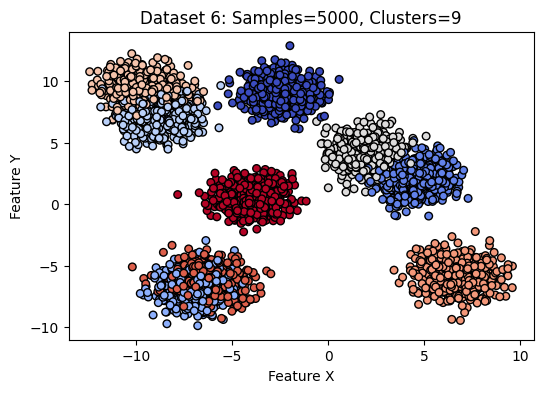

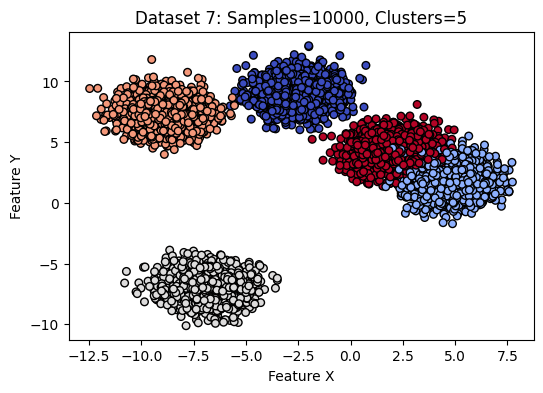

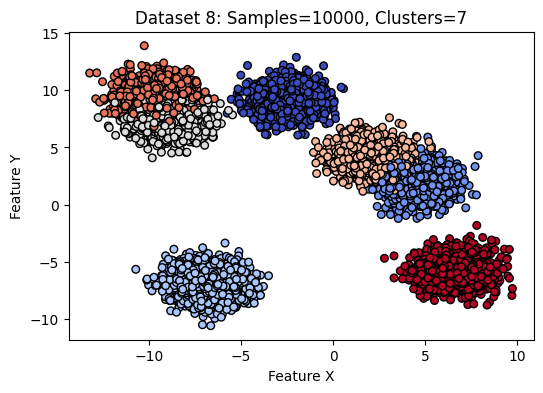

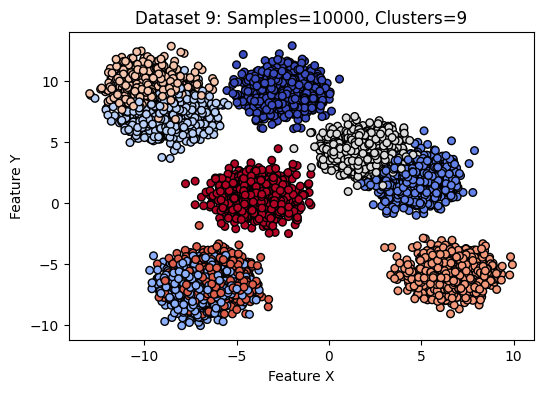

In [4]:
dataset_list = [(create_data(n, c)) for n in sample_sizes for c in cluster_counts]

def display_clusters(data, labels, title):
    """Visualize dataset with labeled clusters."""
    plt.figure(figsize=(6, 4))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='coolwarm', s=30, edgecolors='k')
    plt.title(title)
    plt.xlabel("Feature X")
    plt.ylabel("Feature Y")
    plt.show()

for idx, (data, labels) in enumerate(dataset_list):
    heading = f"Dataset {idx+1}: Samples={sample_sizes[idx // 3]}, Clusters={cluster_counts[idx % 3]}"
    display_clusters(data, labels, heading)

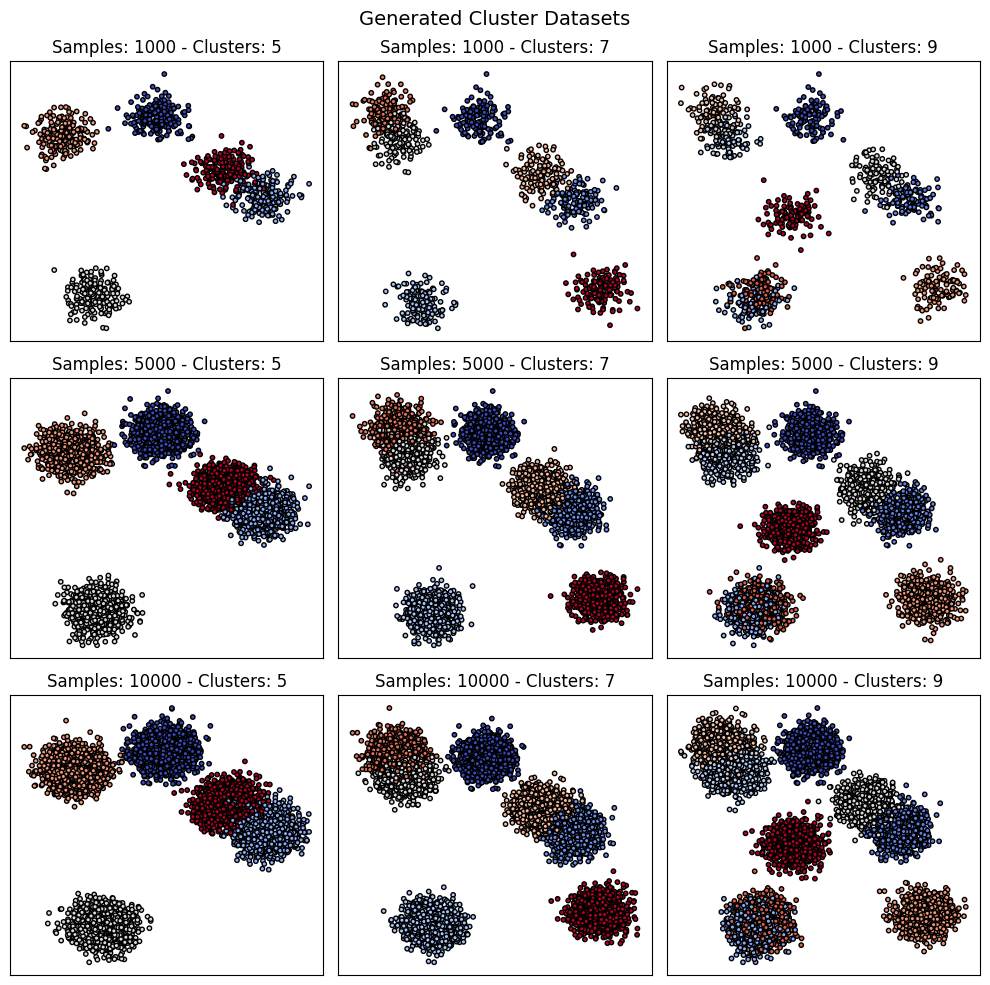

In [5]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
fig.suptitle("Generated Cluster Datasets", fontsize=14)

for idx, (data, labels) in enumerate(dataset_list):
    row, col = divmod(idx, 3)
    axes[row, col].scatter(data[:, 0], data[:, 1], c=labels, cmap='coolwarm', s=10, edgecolors='k')
    axes[row, col].set_title(f"Samples: {sample_sizes[row]} - Clusters: {cluster_counts[col]}")
    axes[row, col].set_xticks([])
    axes[row, col].set_yticks([])

plt.tight_layout()
plt.show()

In [6]:
def custom_kmeans(data, clusters, max_iterations=10):
    """K-Means clustering implementation."""
    np.random.seed(None)
    centroids = data[np.random.choice(len(data), clusters, replace=False)]

    for iteration in range(max_iterations):
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        cluster_assignments = np.argmin(distances, axis=1)

        updated_centroids = []
        for cluster_id in range(clusters):
            if np.any(cluster_assignments == cluster_id):
                updated_centroids.append(data[cluster_assignments == cluster_id].mean(axis=0))
            else:
                updated_centroids.append(data[np.random.choice(len(data))])

        updated_centroids = np.array(updated_centroids)

        plt.figure(figsize=(6, 4))
        plt.scatter(data[:, 0], data[:, 1], c=cluster_assignments, cmap='viridis', s=30, edgecolors='k')
        plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100)
        plt.title(f"Iteration {iteration+1} - Clusters={clusters}")
        plt.show()

        if np.all(centroids == updated_centroids):
            break
        centroids = updated_centroids

    return cluster_assignments, centroids

In [ ]:
analysis_results = []
for index, (data_points, true_labels) in enumerate(dataset_list):
    samples = sample_sizes[index // 3]
    centers = cluster_counts[index % 3]

    print(f"Processing Dataset {index+1} | Samples: {samples}, Clusters: {centers}")

    for attempt in range(5):
        print(f"\tExecution {attempt+1}")
        assigned_labels, centroid_positions = custom_kmeans(data_points, centers, max_iterations=10)

        unique_clusters = np.unique(assigned_labels)
        if len(unique_clusters) > 1:
            score = silhouette_score(data_points, assigned_labels)
            print(f"\tSilhouette Score: {score:.4f}")
        else:
            print("\tSkipping Silhouette Score (Only one cluster detected)")

        analysis_results.append({
            "Dataset": index + 1,
            "Sample Size": samples,
            "Cluster Count": centers,
            "Execution": attempt + 1,
            "Clusters Found": len(unique_clusters),
            "Silhouette Score": score if len(unique_clusters) > 1 else None
        })

In [9]:
df_summary = pd.DataFrame(analysis_results)
print("\nFinal Performance Summary:")
df_summary


Final Performance Summary:


,Dataset,Sample Size,Cluster Count,Execution,Clusters Found,Silhouette Score
0,1,1000,5,1,5,0.644226
1,1,1000,5,2,5,0.480575
2,1,1000,5,3,5,0.620110
3,1,1000,5,4,5,0.621306
4,1,1000,5,5,5,0.677939
5,2,1000,7,1,7,0.606199
6,2,1000,7,2,7,0.560922
7,2,1000,7,3,7,0.603614
8,2,1000,7,4,7,0.605572
9,2,1000,7,5,7,0.562262
